In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

# Text Preprocessing

In [7]:
# import Text Preprocessing libraries
import re
import string

In [8]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [9]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

##### remove links in the dataset

In [11]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))


#### remove punctuations

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [14]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

##### remove numbers in the dataset

In [15]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

##### remove conjunctions

In [16]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import nltk

In [18]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

retreive stop words

In [19]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [20]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [22]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [23]:
data

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfie smile sony mu...
7916,7917,0,would like wish amazing day make every minute ...
7917,7918,0,helping lovely year old neighbor ipad morning ...
7918,7919,0,finally got smart pocket wifi stay connected a...


## Building Vocabulary

In [24]:
from collections import Counter
vocab = Counter()

In [25]:
vocab

Counter()

In [26]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [27]:
vocab #convert words to nuemerical values

Counter({'fingerprint': 5,
         'pregnancy': 1,
         'test': 9,
         'android': 410,
         'apps': 174,
         'beautiful': 227,
         'cute': 321,
         'health': 120,
         'igers': 139,
         'iphoneonly': 129,
         'iphonesia': 137,
         'iphone': 3943,
         'finally': 185,
         'transparant': 1,
         'silicon': 2,
         'case': 271,
         'thanks': 149,
         'uncle': 4,
         'yay': 68,
         'sony': 818,
         'xperia': 57,
         'sonyexperias…': 1,
         'love': 432,
         'would': 146,
         'go': 122,
         'talk': 16,
         'makememories': 1,
         'unplug': 2,
         'relax': 33,
         'smartphone': 119,
         'wifi': 50,
         'connect': 11,
         'im': 294,
         'wired': 5,
         'know': 99,
         'george': 1,
         'made': 72,
         'way': 49,
         'daventry': 1,
         'home': 143,
         'amazing': 173,
         'service': 45,
         'apple': 

In [28]:
len(vocab) #unique words count

18138

In [29]:
data.shape

(7920, 3)

In [30]:
# filter values grater than 10
tokens = [key for key in vocab if vocab[key] > 10]

In [31]:
tokens

['android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone',
 'finally',
 'case',
 'thanks',
 'yay',
 'sony',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphone',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amazing',
 'service',
 'apple',
 'wont',
 'even',
 'pay',
 'stupid',
 'support',
 'software',
 'update',
 'fucked',
 'phone',
 'big',
 'time',
 'iphones',
 'happy',
 'us',
 'instapic',
 'instadaily',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cable',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'starting',
 'technology',
 'samsunggalaxys',
 'iphonex',
 'shopping',
 'listening',
 'music',
 'likeforlike',
 'photo',
 'fun',
 'selfie',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'crash',
 'every',
 'need',
 'really',
 'dropped',
 'design',
 'giving',
 'another',
 'crazy',
 'purchase',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 '

In [32]:
# new word count
len(tokens)

1156

den 1156 ta adu wela kiyala penawa

In [33]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')



# cross validation

In [34]:
data

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfie smile sony mu...
7916,7917,0,would like wish amazing day make every minute ...
7917,7918,0,helping lovely year old neighbor ipad morning ...
7918,7919,0,finally got smart pocket wifi stay connected a...


In [35]:
X=data['tweet']
y=data['label']

In [36]:
X

0       fingerprint pregnancy test android apps beauti...
1       finally transparant silicon case thanks uncle ...
2       love would go talk makememories unplug relax i...
3       im wired know im george made way iphone cute d...
4       amazing service apple wont even talk question ...
                              ...                        
7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely year old neighbor ipad morning ...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, Length: 7920, dtype: object

In [37]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

### split dataset

In [38]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
X_train

3856    gb iphone selling materials worth according on...
1080    drop shazam app get soundhound iphone premium ...
7673                  never getting iphone unless pay use
2783    summer sunday morning enjoyeverymoment iphone ...
3833    top gear extreme parking … андроид android gam...
                              ...                        
7004    take — steemit … blue sky sun life photo photo...
6735    need valentines day iphone wallpaper check lov...
2409    samsung hdtv last day save big next smart tv c...
6550    solid ironman favorite tunes stand test time e...
481             problems samsung galaxy froyo well lagfix
Name: tweet, Length: 6336, dtype: object

In [41]:
X_test

5461          ipod skipping thats supposed happen cds mps
3279    first transaction applepay starbucks apple iph...
6563    linneaebba come dark side android youll love a...
3006    practice zoom lens iphone bumble fog morningwa...
4228    messing around goofy messing fun samsung woodw...
                              ...                        
7238    never thought id say deleted alllllll contacts...
3733    better safe sorry ps safety games car belt fun...
5281    love computer freezes clears contents ipod lik...
5665    enjoy thanks apple team thanks aditya utit deb...
492     gain followers rt must follow follow back foll...
Name: tweet, Length: 1584, dtype: object

In [42]:
y_train

3856    1
1080    0
7673    1
2783    0
3833    0
       ..
7004    0
6735    0
2409    0
6550    0
481     0
Name: label, Length: 6336, dtype: int64

## vectorization

In [43]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [44]:
vectorized_x_train = vectorizer(X_train, tokens)


In [45]:
vectorized_x_test = vectorizer(X_test, tokens)

In [46]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
y_train

3856    1
1080    0
7673    1
2783    0
3833    0
       ..
7004    0
6735    0
2409    0
6550    0
481     0
Name: label, Length: 6336, dtype: int64

In [48]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [49]:
y_test

5461    1
3279    0
6563    0
3006    0
4228    0
       ..
7238    1
3733    0
5281    0
5665    0
492     0
Name: label, Length: 1584, dtype: int64

In [50]:
y_train.value_counts()

0    4718
1    1618
Name: label, dtype: int64

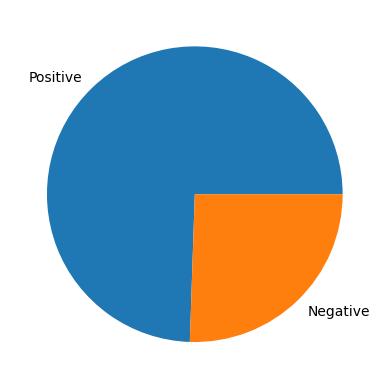

In [51]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

## Handle imbalanced dataset

In [52]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9436, 1156) (9436,)


In [54]:
y_train_smote.value_counts()

1    4718
0    4718
Name: label, dtype: int64

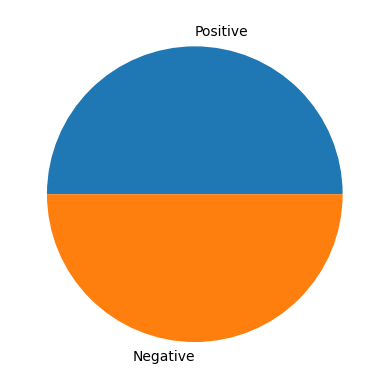

In [55]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [56]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
y_train_smote

0       1
1       0
2       1
3       0
4       0
       ..
9431    1
9432    1
9433    1
9434    1
9435    1
Name: label, Length: 9436, dtype: int64

In [58]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
y_test

5461    1
3279    0
6563    0
3006    0
4228    0
       ..
7238    1
3733    0
5281    0
5665    0
492     0
Name: label, Length: 1584, dtype: int64

## Model Training and Evaluation

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

## Logistic Regression

In [62]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

LogisticRegression()

In [63]:
y_train_pred =lr.predict(vectorized_x_train_smote)

In [64]:

y_test_pred = lr.predict(vectorized_x_test)

y_test_pred



array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [65]:
training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.936
	Precision = 0.908
	Recall = 0.971
	F1-Score = 0.938
Testing Scores:
	Accuracy = 0.862
	Precision = 0.683
	Recall = 0.865
	F1-Score = 0.763


## Naive Bayes

In [66]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.902
	Precision = 0.864
	Recall = 0.954
	F1-Score = 0.907
Testing Scores:
	Accuracy = 0.848
	Precision = 0.649
	Recall = 0.89
	F1-Score = 0.751


## Decision Tree

In [67]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.999
	Precision = 0.999
	Recall = 0.999
	F1-Score = 0.999
Testing Scores:
	Accuracy = 0.814
	Precision = 0.642
	Recall = 0.627
	F1-Score = 0.634


## Random Forest

In [68]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.999
	Precision = 0.999
	Recall = 0.999
	F1-Score = 0.999
Testing Scores:
	Accuracy = 0.853
	Precision = 0.711
	Recall = 0.723
	F1-Score = 0.717


## Support Vector Machine

In [69]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.973
	Precision = 0.953
	Recall = 0.994
	F1-Score = 0.973
Testing Scores:
	Accuracy = 0.867
	Precision = 0.719
	Recall = 0.797
	F1-Score = 0.756


In [70]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)